### IMPORT_LIBRARY
Import the required libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots

### LOAD_DATASET
Loading the dataset

In [48]:
df =pd.read_csv("water_potability.csv")

### DATASET_EXPLORATION
We here try to peek into the dataset and understand the dataset

In [49]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [50]:
df.shape

(3276, 10)

In [51]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
ph,0.000000,7.036752,7.080795,14.000000,1.594320
Hardness,47.432000,196.967627,196.369496,323.124000,32.879761
Solids,320.942611,20927.833607,22014.092526,61227.196008,8768.570828
Chloramines,0.352000,7.130299,7.122277,13.127000,1.583085
Sulfate,129.000000,333.073546,333.775777,481.030642,41.416840
Conductivity,181.483754,421.884968,426.205111,753.342620,80.824064
Organic_carbon,2.200000,14.218338,14.284970,28.300000,3.308162
Trihalomethanes,0.738000,66.622485,66.396293,124.000000,16.175008
Turbidity,1.450000,3.955028,3.966786,6.739000,0.780382
Potability,0.000000,0.000000,0.390110,1.000000,0.487849


In [52]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [53]:
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [10]:
columns_name=df.columns
for col in df.columns:
    print(col)

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity
Potability


In [11]:
df.duplicated().any()

False

### DATA VISUALIZATION {LOOK INTO THE DATASET}
Here we try to analyze the dataset

In [12]:
p=df['Potability'].value_counts()
p

Potability
0    1200
1     811
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x78249a79c3d0>,
 [Text(-0.32911438527483855, 1.0496112239325404, '0'),
  Text(0.3291144835465322, -1.0496111931186232, '1')])

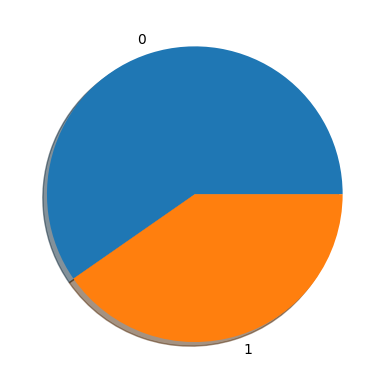

In [13]:
plt.pie(p,labels=[0,1],shadow=True)

### SPLIT_DATA && NORMALIZATION
Here we split the dataset intro train and test {30% test and 70% train}

In [14]:
x=df.drop("Potability",axis=1)  # acts as features for classification  except the last column
y=df.Potability                 # acts as label [last column]

In [15]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [16]:
y

3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
df.describe().loc[['min','max','std','mean']].T.style.background_gradient(axis=1)

,min,max,std,mean
ph,0.000000,1.000000,0.114238,0.497984
Hardness,0.000000,1.000000,0.133835,0.502267
Solids,0.000000,1.000000,0.153865,0.384500
Chloramines,0.000000,1.000000,0.135038,0.489383
Sulfate,0.000000,1.000000,0.117050,0.580133
Conductivity,0.000000,1.000000,0.146292,0.407644
Organic_carbon,0.000000,1.000000,0.134035,0.490098
Trihalomethanes,0.000000,1.000000,0.139289,0.500973
Turbidity,0.000000,1.000000,0.154685,0.499476


In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,shuffle=True,random_state=42)

In [19]:
print("x_train shape = ", x_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", x_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (1407, 9)
y_train shape =  (1407,)
x_test shape =  (604, 9)
y_test shape =  (604,)


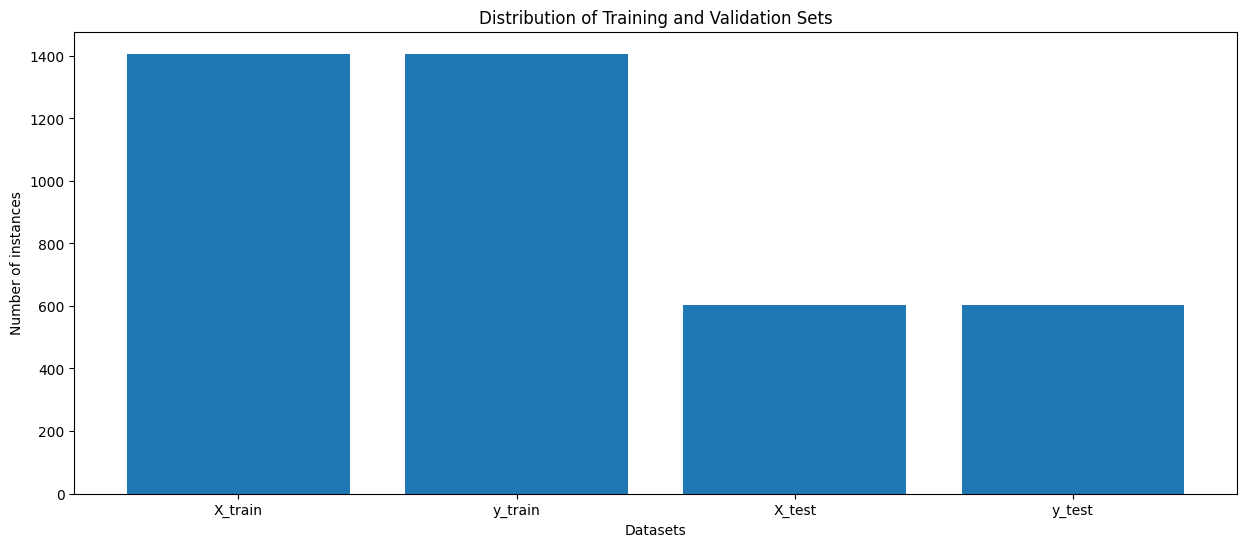

In [20]:
shapes = {
    'X_train': x_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': x_test.shape[0],
    'y_test': y_test.shape[0]
}
plt.figure(figsize=(15, 6))
plt.bar(shapes.keys(), shapes.values())
plt.xlabel('Datasets')
plt.ylabel('Number of instances')
plt.title('Distribution of Training and Validation Sets')
plt.show()

### MODELING_EVALUATION
We tarin the Model using different models of evaluation.

In our project we train using 3 differnt models and choose the one which is the best .

1. LOGISTIC REGRESSION MODEL
2. SVM MODEL
3. DECISION TREE MODEL

### 1. LOGICTIC REGRESSION MODEL


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [36]:
# Model Creation
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lrm_pred=lr_model.predict(x_test)

In [37]:
lrm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

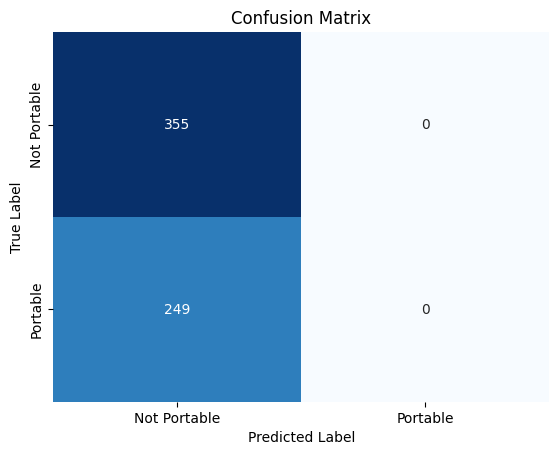

classification_report is 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       355
           1       0.00      0.00      0.00       249

    accuracy                           0.59       604
   macro avg       0.29      0.50      0.37       604
weighted avg       0.35      0.59      0.44       604



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [38]:
# Model Evaluation
  # 1. Confusion matrix creation
con= confusion_matrix(y_test,lrm_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False,

            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
  # 2. Printing the performance metric values
print("classification_report is ")
print(classification_report(y_test ,lrm_pred))

### 2. SVM_MODEL

In [39]:
from sklearn.svm import SVC
from sklearn.svm import SVC ## call model


In [40]:
# Model Creation
svm_model =SVC()
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)

In [41]:
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

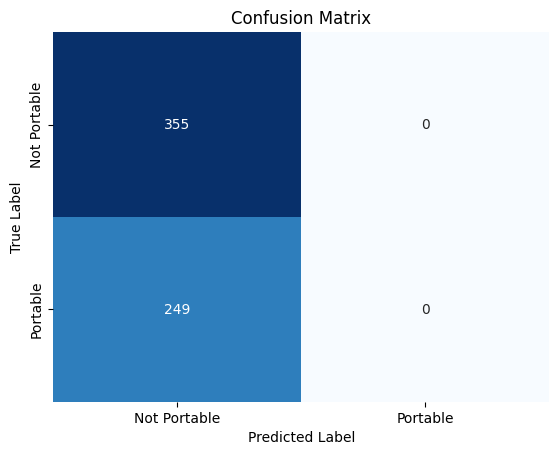

classification_report is 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       355
           1       0.00      0.00      0.00       249

    accuracy                           0.59       604
   macro avg       0.29      0.50      0.37       604
weighted avg       0.35      0.59      0.44       604



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
# Model Evaluation
  # 1. Confusion matrix creation
con= confusion_matrix(y_test,svm_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False,

            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
  # 2. Printing the performance metric values
print("classification_report is ")
print(classification_report(y_test ,svm_pred))

### 3. DECISION_TREE_MODEL

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Model Creation
dt_model = DecisionTreeClassifier()
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,10,20,25],
    'min_samples_leaf' : [10,20,30,40]
}
grid_search = GridSearchCV(dt_model, params, cv = 5 )
grid_search.fit(x_train, y_train)
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 30)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

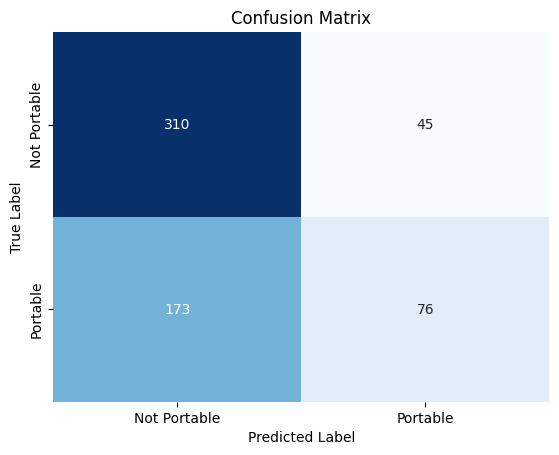

Testing Classification Report of DecisionTreeClassifier : 
              precision    recall  f1-score   support

           0       0.64      0.87      0.74       355
           1       0.63      0.31      0.41       249

    accuracy                           0.64       604
   macro avg       0.63      0.59      0.58       604
weighted avg       0.64      0.64      0.60       604



In [34]:
# Model Evaluation
  # 1. Creation of Confusion Matrix
con= confusion_matrix(y_test,dt_pred) # Evaluation of Model Performance & Sensitivity and Specificity Analysis
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False,

            xticklabels=['Not Portable', 'Portable'],yticklabels=['Not Portable', 'Portable'],)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
  # 2. printing the performance metric values
print("Testing Classification Report of DecisionTreeClassifier : ")
print(classification_report(y_test, dt_pred))

### COMPARISION B/W ALL MODELS

### CHOOSING THE BEST MODEL

As now we have seen all the 3 model's perfomance now we analyze each model's performance and choose the one which gives best performance



          Logistic Regression  Decision Tree  Support Vector
Accuracy                 0.59           0.64            0.59


<Axes: >

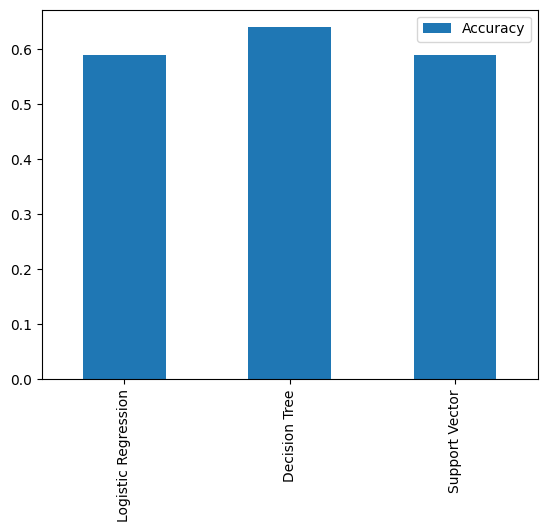

In [46]:
# Just printing the summary results
result=pd.DataFrame({"ALGORITHM":["LogisticRegression","SVC","DecisionTreeClassifier"],

          "accuracy":[ 0.59,0.59,0.64,] })
result.style.background_gradient()

# Bar Graph results
model_scores = {'Logistic Regression': 0.59,
'Decision Tree': 0.64,
'Support Vector': 0.59}
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
print(model_compare)
model_compare.T.plot(kind='bar')

#### BY THE ABOVE ANALYSIS THE BEST MODEL TO CHOOSE FOR THIS DATASET IS DECISION TREE CLASSIFICATION

AUTHORS :  


1.   TANISHQ.S
2.   SYED ATEEBUDIN AHMED
3.   VINAY


